In [1]:
from NeuralNetwork.dense import Dense
from NeuralNetwork.losses import mse,mse_derive
from NeuralNetwork.activations import Sigmoid,Softmax
from NeuralNetwork.network import predict
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
EPOCH = 100
ALPHA = 0.03

In [10]:
class TreeNN():
    def __init__(self,depth=1,max_depth=10,parent_node = None):
        self.parent_node = parent_node
        self.NN = [
            Dense(784,10),
            Sigmoid(),
            Softmax()
        ]
        self.depth = depth
        self.max_depth = max_depth
        self.child = None
    
    def train_tree(self,X,Y,epoch=EPOCH,alpha=ALPHA,verbose = False):
        print("Training Tree Node at depth: ",self.depth)
        self.X = X
        self.Y = Y
        error_TS = []
        acc_TS = []
        incorrect_indices = []
        for e in range(epoch):
            errors = 0
            acc = 0
            for x, y in zip(self.X, self.Y):
                out = predict(self.NN, x)
                if np.argmax(y)==np.argmax(out):
                    acc+=1
                    errors += mse(y, out)
                elif self.depth==self.max_depth:
                    errors +=mse(y,out)
                gradient = mse_derive(y, out)
                for layer in reversed(self.NN):
                    gradient = layer.backward(gradient, alpha)
            errors /= len(self.X)
            acc /=len(self.X)
            if verbose:
                print(f"{e + 1}/{epoch}, Train_error={errors}, Train_accuracy={acc}")
            error_TS.append(errors)
            acc_TS.append(acc)
        val_acc = 0
        val_error = 0
        index = 0
        print(f"Train_error={errors}, Train_accuracy={acc}")

        #Passing on incorrect indices
        for x, y in zip(self.X, self.Y):
            output = predict(self.NN, x)
            if np.argmax(y)==np.argmax(output):
                val_acc+=1
            else:
                incorrect_indices.append(index)
            val_error += mse(y, output)
            index +=1
        
        X_out = self.X[incorrect_indices]
        Y_out = self.Y[incorrect_indices]

        print("Incorrect Samples",len(incorrect_indices))
        if self.depth<self.max_depth:
            self.child = TreeNN(depth=self.depth+1,max_depth=self.max_depth,parent_node=self)
            self.child.train_tree(X_out,Y_out)

    
    def predict(self,X):
        predictions = []
        for x in X:
            output = predict(self.NN, x)
            predictions.append(output)
        return predictions
        # check for more probability




if self.child == None:
            return None
        child_predictions = self.child.predict(X)
        predictions = []

        if child_predictions.all() == None:
            for x in X:
                out = predict(self.NN, x)
                predictions.append(out)
            predictions = np.asanyarray(predictions)
            return predictions
        
        for x in X:
            out = predict(self.NN, x)
            predictions.append(out)
        predictions = np.asanyarray(predictions)

        final = []
        # TO be tweaked
        for pred, child in zip(predictions,child_predictions):
            if np.argmax(pred) != np.argmax(child):
                final.append(pred)
            else:
                if pred[np.argmax(pred)] > child[np.argmax(child)]:
                    final.append(pred)
                else:
                    final.append(child)
        return np.asanyarray(final)

In [4]:
def evaluate_tree(tnn,X_test,Y_test,size,depth = 0):
    if tnn== None:
        return X_test,Y_test,[0],[0]
    X_test,Y_test,TS_error,TS_acc = evaluate_tree(tnn.child,X_test,Y_test,size,depth+1) 
    predictions = tnn.predict(X_test)
    incorrect_indices = []
    index = 0
    test_error = TS_error[-1]
    test_acc = TS_acc[-1]

    for pred, true in zip(predictions, Y_test):
        if np.argmax(pred)==np.argmax(true):
            test_acc+=1
            test_error += mse(true, pred)
        else:
            incorrect_indices.append(index)
            if depth==0:
                test_error += mse(true, pred)

        index +=1   
    TS_error.append(test_error)
    TS_acc.append(test_acc)
#    if depth==0:
    print(f"Test_error={test_error/size}, Test_accuracy={test_acc/size}")
    return X_test[incorrect_indices],Y_test[incorrect_indices],TS_error,TS_acc
        


In [5]:
df_train = pd.read_csv("./dataset/MNIST.csv")

In [6]:
Y_test,X_test =  df_train.iloc[:2000, :1], df_train.iloc[:2000, 1:]
Y_train,X_train = df_train.iloc[2000:, :1], df_train.iloc[2000:, 1:]
X_in = np.reshape(X_train,X_train.shape +(1,))
Y_in = np.squeeze(np.eye(10)[Y_train])
Y_in = np.reshape(Y_in,Y_in.shape +(1,))
X_test = np.reshape(X_test,X_test.shape +(1,))
Y_test = np.squeeze(np.eye(10)[Y_test])
Y_test = np.reshape(Y_test,Y_test.shape +(1,))

In [7]:
Y_in.shape

(40000, 10, 1)

In [11]:
tnn = TreeNN()

In [13]:
tnn.train_tree(X_in,Y_in,verbose=True)

Training Tree Node at depth:  1
1/100, Train_error=0.034848864237779074, Train_accuracy=0.50925
2/100, Train_error=0.034640257993131265, Train_accuracy=0.50595
3/100, Train_error=0.03654954268658183, Train_accuracy=0.5364


KeyboardInterrupt: 

In [ ]:
X_out,Y_out,TS_error,TS_acc = evaluate_tree(tnn,X_test,Y_test,len(X_test))

Test_error=0.010111425759223582, Test_accuracy=0.1245
Test_error=0.017253859106317247, Test_accuracy=0.213
Test_error=0.023967955781006255, Test_accuracy=0.305
Test_error=0.029342082565057267, Test_accuracy=0.378
Test_error=0.0380696976547617, Test_accuracy=0.496
Test_error=0.04412376374659193, Test_accuracy=0.574
Test_error=0.054031308986198234, Test_accuracy=0.7055
Test_error=0.05873250226737075, Test_accuracy=0.767
Test_error=0.06690971493757444, Test_accuracy=0.882
Test_error=0.07556930459175375, Test_accuracy=0.952


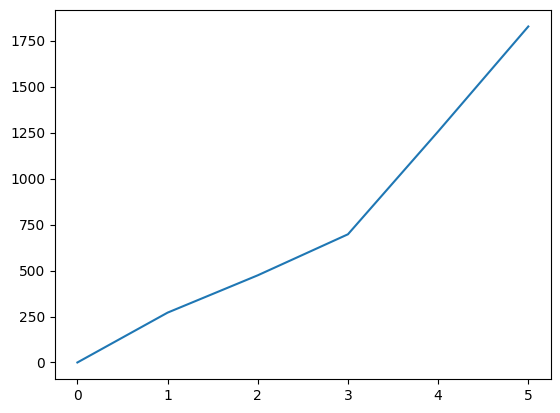

In [ ]:
plt.plot(TS_acc)

In [ ]:
TS_acc

[0, 271, 474, 697, 1256, 1827]